In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

from scripts import data, visualize

In [6]:
assets = set(f.split('USD')[0] for f in os.listdir('data') if f.endswith('.csv') and 'USD' in f)

In [9]:
mkt_data = {}

In [10]:
for asset in assets:
    df = df = pd.read_csv(f'data/{asset}USD_md.csv', index_col=0)
    df.index = pd.to_datetime(df.index, unit = 'ms')
    df['mid'] = .5 * (df.ask + df.bid) 
    df['spread'] = df.ask - df.bid
    mkt_data[asset] = df

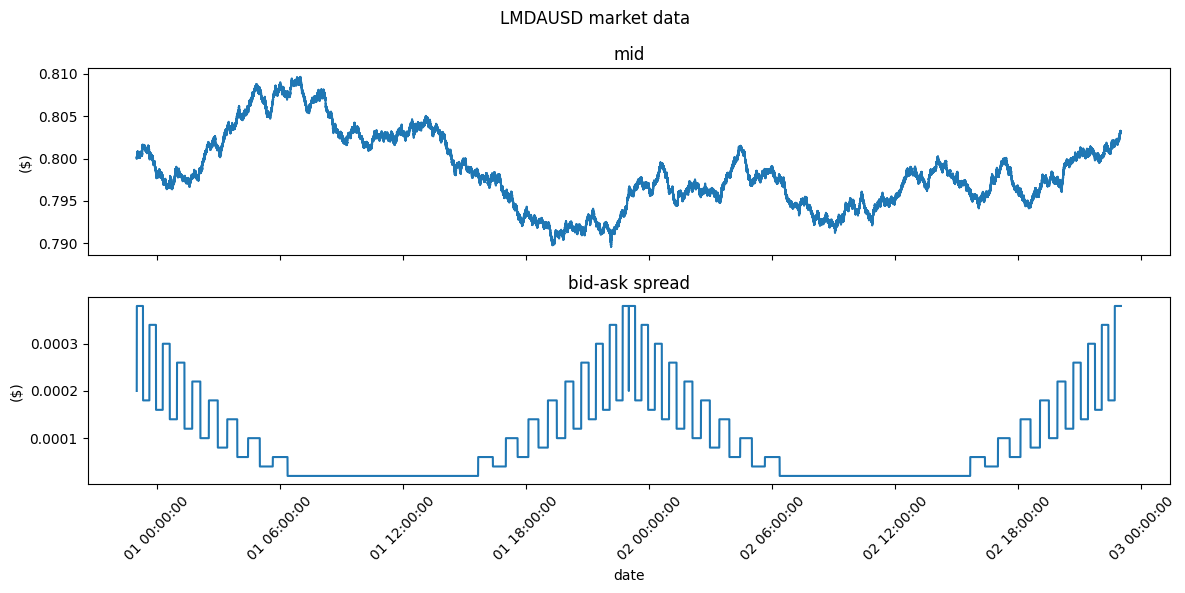

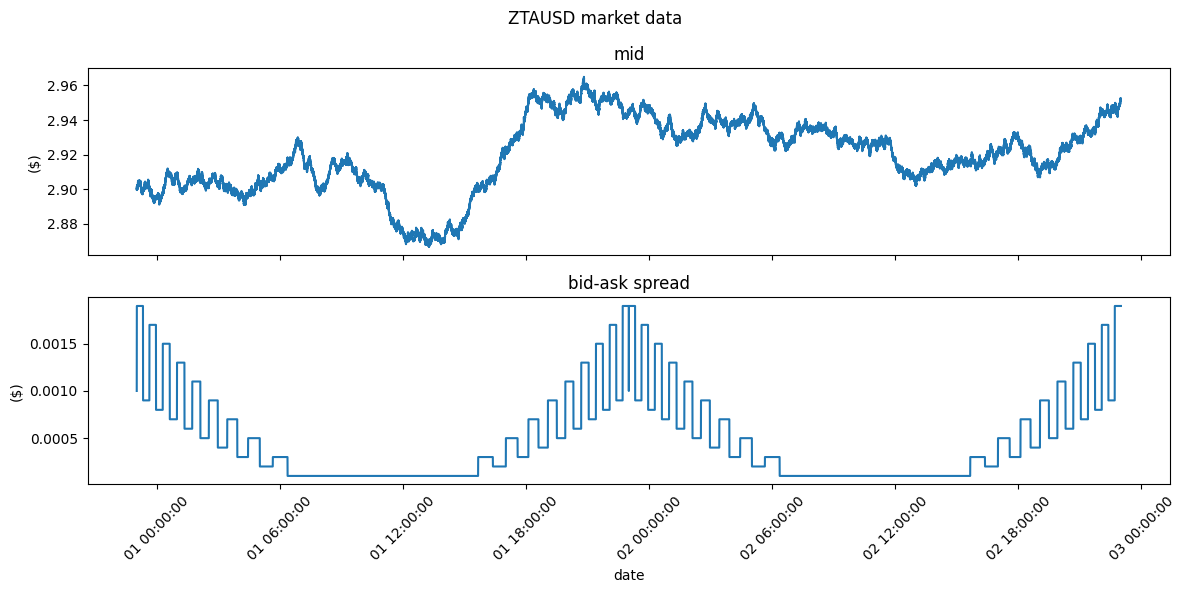

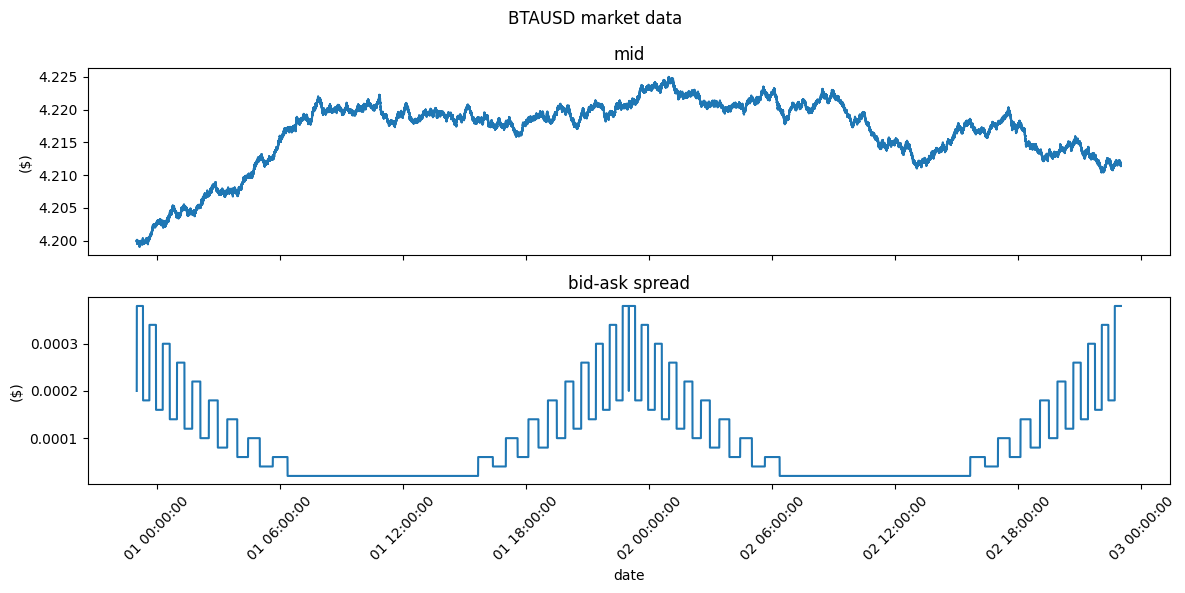

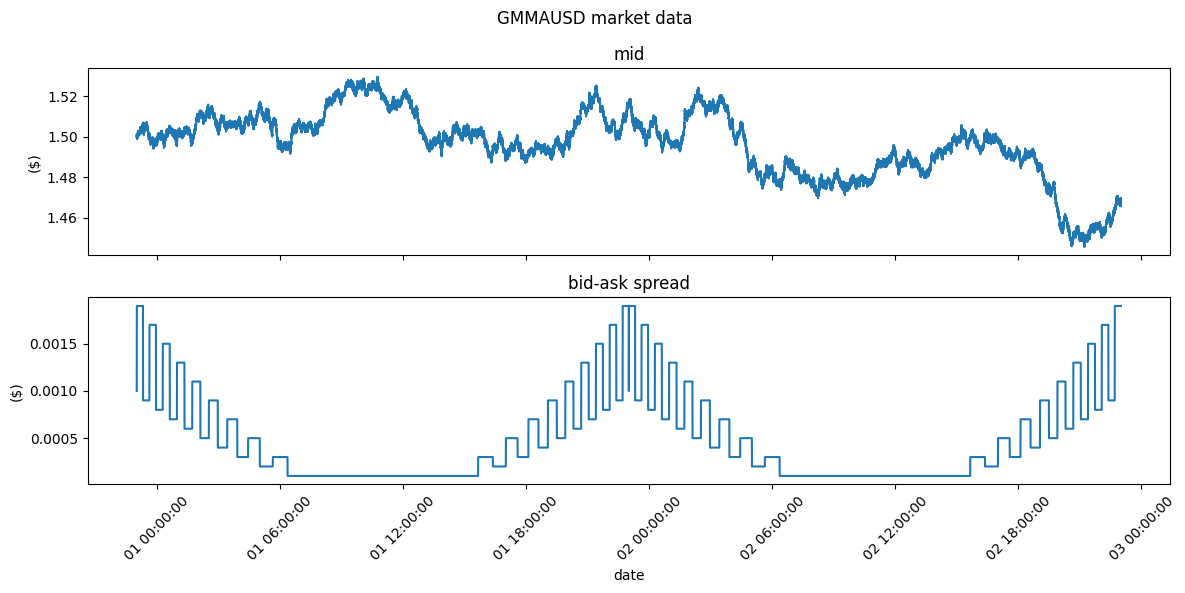

In [12]:
for asset, df in mkt_data.items():
    fig, axs = plt.subplots(2, figsize=(12, 6), sharex = True)
    fig.suptitle(f'{asset}USD market data')
    

    axs[0].plot(df.index, df.mid)
    axs[0].set_title(f'mid')

    axs[1].plot(df.index, df.spread) 
    axs[1].set_title(f'bid-ask spread')
    
    axs[1].xaxis.set_major_locator(mdates.AutoDateLocator())
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M:%S'))


    for ax in axs:
        ax.set(ylabel='($)')

    plt.xlabel('date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()